from: https://www.youtube.com/watch?v=j-3vuBynnOE
<br>
data: https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

data_dir = 'kagglecatsanddogs_3367a/PetImages'
categories = ['Dog', 'Cat']

for category in categories:
    path = os.path.join(data_dir, category) # path to cas or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img)
                              , cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array
                  , cmap='gray')
        plt.show()
        break
    break

<Figure size 640x480 with 1 Axes>

In [2]:
print(img_array)

[[65 64 62 ... 21 21 22]
 [63 62 61 ... 21 22 22]
 [61 60 59 ... 23 23 23]
 ...
 [57 58 59 ... 47 47 47]
 [58 59 60 ... 43 43 43]
 [59 60 62 ... 42 41 41]]


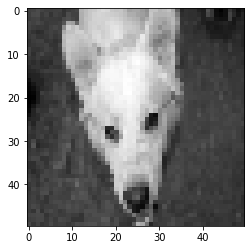

In [3]:
img_size = 50

new_array = cv2.resize(img_array
                      , (img_size, img_size))

plt.imshow(new_array
          , cmap='gray');

In [4]:
train_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category) # path to cas or dogs dir
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img)
                                      , cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array
                                       , (img_size, img_size))
                train_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [5]:
len(train_data)

24946

In [6]:
import random

In [7]:
random.shuffle(train_data)

In [8]:
for sample in train_data[:10]:
    print(sample[1]) # prints the categories: 0 for dog 1 for cats

0
0
0
0
1
0
1
1
0
0


In [9]:
X = []
y = []

for features, label in train_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 1)

### Save the data

In [10]:
import pickle

pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()


In [11]:
# Load pickle files

In [12]:
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)
pickle_in.close()

In [13]:
pickle_in = open('y.pickle', 'rb')
y = pickle.load(pickle_in)
pickle_in.close()

In [14]:
X.shape

(24946, 50, 50, 1)

In [15]:
y = np.array(y)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [17]:
# scale image files by dividing by 255 because pixel data is just 0 to 255

In [18]:
X = X/255.0


In [19]:
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)

In [20]:
sess = tf.compat.v1.Session(config = tf.compat.v1.ConfigProto(gpu_options=gpu_options))

Reference: https://www.youtube.com/watch?v=BqgTU7_cBnk

In [29]:
from tensorflow.keras.callbacks import TensorBoard
import time

In [34]:
tb = TensorBoard(log_dir='logs/{}'.format(name))

In [42]:
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            name = "{}-conv-{}-nodes-{}-dense{}".format(conv_layer
                                                       , layer_size
                                                       , dense_layer
                                                       , int(time.time()))
            print(name)
            
            model = Sequential()

            model.add(Conv2D(layer_size # number of neurons for this 1st layer
                             , (3, 3) # convolution window 3x3
                             , input_shape = X.shape[1:] # shape of data 50 by 50e
                             , activation = 'relu')) # activation function in relu
            model.add(MaxPooling2D((2, 2))) # like convolution window take max with 2x2 window

            
            for l in range(conv_layer - 1):
                model.add(Conv2D(layer_size
                                 , (3, 3)
                                 , activation = "relu"))
                model.add(MaxPooling2D((2, 2)))
            
            model.add(Flatten())
            for l in range(dense_layer):
                model.add(Dense(layer_size
                                , activation='relu'))


            model.add(Dense(1
                            , activation ='sigmoid'))

            model.compile(loss='binary_crossentropy'
                          , optimizer =  'sgd'
                          , metrics = ['accuracy'])

            model.fit(X
                      , y
                      , batch_size=32 # somewhere in the 20's to 200's
                      , epochs = 20
                      , validation_split=0.10
                      , callbacks=[tb]) #validation split
            
            tb = TensorBoard(log_dir='logs/{}'.format(name))

1-conv-32-nodes-0-dense1581996812
Train on 22451 samples, validate on 2495 samples
Epoch 1/20
22451/22451 [==============================] - 9s 392us/sample - loss: 0.6835 - accuracy: 0.5611 - val_loss: 0.6737 - val_accuracy: 0.6056
Epoch 2/20
22451/22451 [==============================] - 8s 369us/sample - loss: 0.6704 - accuracy: 0.5861 - val_loss: 0.6645 - val_accuracy: 0.6232
Epoch 3/20
22451/22451 [==============================] - 9s 379us/sample - loss: 0.6590 - accuracy: 0.6111 - val_loss: 0.6536 - val_accuracy: 0.6317
Epoch 4/20
22451/22451 [==============================] - 9s 379us/sample - loss: 0.6415 - accuracy: 0.6381 - val_loss: 0.6400 - val_accuracy: 0.6341
Epoch 5/20
22451/22451 [==============================] - 9s 381us/sample - loss: 0.6281 - accuracy: 0.6522 - val_loss: 0.6391 - val_accuracy: 0.6361
Epoch 6/20
22451/22451 [==============================] - 8s 378us/sample - loss: 0.6168 - accuracy: 0.6647 - val_loss: 0.6247 - val_accuracy: 0.6589
Epoch 7/20
22451/

22451/22451 [==============================] - 16s 729us/sample - loss: 0.6067 - accuracy: 0.6694 - val_loss: 0.6313 - val_accuracy: 0.6461
Epoch 14/20
22451/22451 [==============================] - 16s 723us/sample - loss: 0.5990 - accuracy: 0.6767 - val_loss: 0.6108 - val_accuracy: 0.6653
Epoch 15/20
22451/22451 [==============================] - 17s 738us/sample - loss: 0.5904 - accuracy: 0.6864 - val_loss: 0.6597 - val_accuracy: 0.6044
Epoch 16/20
22451/22451 [==============================] - 17s 771us/sample - loss: 0.5831 - accuracy: 0.6940 - val_loss: 0.5854 - val_accuracy: 0.6934
Epoch 17/20
22451/22451 [==============================] - 16s 706us/sample - loss: 0.5750 - accuracy: 0.7017 - val_loss: 0.5808 - val_accuracy: 0.7006
Epoch 18/20
22451/22451 [==============================] - 15s 666us/sample - loss: 0.5669 - accuracy: 0.7085 - val_loss: 0.5760 - val_accuracy: 0.7002
Epoch 19/20
22451/22451 [==============================] - 15s 666us/sample - loss: 0.5590 - accurac

Epoch 6/20
22451/22451 [==============================] - 30s 1ms/sample - loss: 0.6665 - accuracy: 0.5993 - val_loss: 0.6658 - val_accuracy: 0.5888
Epoch 7/20
22451/22451 [==============================] - 31s 1ms/sample - loss: 0.6582 - accuracy: 0.6083 - val_loss: 0.6505 - val_accuracy: 0.6329
Epoch 8/20
22451/22451 [==============================] - 30s 1ms/sample - loss: 0.6501 - accuracy: 0.6175 - val_loss: 0.6760 - val_accuracy: 0.5679
Epoch 9/20
22451/22451 [==============================] - 30s 1ms/sample - loss: 0.6417 - accuracy: 0.6284 - val_loss: 0.6476 - val_accuracy: 0.6156
Epoch 10/20
22451/22451 [==============================] - 30s 1ms/sample - loss: 0.6327 - accuracy: 0.6418 - val_loss: 0.6488 - val_accuracy: 0.6152
Epoch 11/20
22451/22451 [==============================] - 30s 1ms/sample - loss: 0.6253 - accuracy: 0.6491 - val_loss: 0.6258 - val_accuracy: 0.6565
Epoch 12/20
22451/22451 [==============================] - 30s 1ms/sample - loss: 0.6181 - accuracy: 0.6

22451/22451 [==============================] - 77s 3ms/sample - loss: 0.5077 - accuracy: 0.7536 - val_loss: 0.5197 - val_accuracy: 0.7447
Epoch 20/20
22451/22451 [==============================] - 79s 4ms/sample - loss: 0.5021 - accuracy: 0.7579 - val_loss: 0.5150 - val_accuracy: 0.7447
3-conv-128-nodes-0-dense1582001150
Train on 22451 samples, validate on 2495 samples
Epoch 1/20
22451/22451 [==============================] - 84s 4ms/sample - loss: 0.6915 - accuracy: 0.5322 - val_loss: 0.6895 - val_accuracy: 0.5788
Epoch 2/20
22451/22451 [==============================] - 84s 4ms/sample - loss: 0.6876 - accuracy: 0.5589 - val_loss: 0.6856 - val_accuracy: 0.5864
Epoch 3/20
22451/22451 [==============================] - 84s 4ms/sample - loss: 0.6833 - accuracy: 0.5704 - val_loss: 0.6818 - val_accuracy: 0.5515
Epoch 4/20
22451/22451 [==============================] - 86s 4ms/sample - loss: 0.6781 - accuracy: 0.5826 - val_loss: 0.6752 - val_accuracy: 0.5687
Epoch 5/20
22451/22451 [========

Epoch 12/20
22451/22451 [==============================] - 14s 643us/sample - loss: 0.5636 - accuracy: 0.7119 - val_loss: 0.5970 - val_accuracy: 0.6786
Epoch 13/20
22451/22451 [==============================] - 14s 642us/sample - loss: 0.5517 - accuracy: 0.7191 - val_loss: 0.6405 - val_accuracy: 0.6401
Epoch 14/20
22451/22451 [==============================] - 14s 643us/sample - loss: 0.5398 - accuracy: 0.7302 - val_loss: 0.5490 - val_accuracy: 0.7230
Epoch 15/20
22451/22451 [==============================] - 14s 644us/sample - loss: 0.5300 - accuracy: 0.7374 - val_loss: 0.5382 - val_accuracy: 0.7279
Epoch 16/20
22451/22451 [==============================] - 14s 641us/sample - loss: 0.5190 - accuracy: 0.7470 - val_loss: 0.5936 - val_accuracy: 0.6862
Epoch 17/20
22451/22451 [==============================] - 15s 646us/sample - loss: 0.5097 - accuracy: 0.7518 - val_loss: 0.5340 - val_accuracy: 0.7331
Epoch 18/20
22451/22451 [==============================] - 14s 642us/sample - loss: 0.50

22451/22451 [==============================] - 29s 1ms/sample - loss: 0.6524 - accuracy: 0.6214 - val_loss: 0.6567 - val_accuracy: 0.6044
Epoch 5/20
22451/22451 [==============================] - 29s 1ms/sample - loss: 0.6421 - accuracy: 0.6291 - val_loss: 0.7016 - val_accuracy: 0.5331
Epoch 6/20
22451/22451 [==============================] - 29s 1ms/sample - loss: 0.6319 - accuracy: 0.6450 - val_loss: 0.6390 - val_accuracy: 0.6277
Epoch 7/20
22451/22451 [==============================] - 29s 1ms/sample - loss: 0.6228 - accuracy: 0.6523 - val_loss: 0.6148 - val_accuracy: 0.6681
Epoch 8/20
22451/22451 [==============================] - 29s 1ms/sample - loss: 0.6109 - accuracy: 0.6679 - val_loss: 0.6363 - val_accuracy: 0.6317
Epoch 9/20
22451/22451 [==============================] - 29s 1ms/sample - loss: 0.5976 - accuracy: 0.6784 - val_loss: 0.5966 - val_accuracy: 0.6778
Epoch 10/20
22451/22451 [==============================] - 29s 1ms/sample - loss: 0.5842 - accuracy: 0.6912 - val_los

Epoch 18/20
22451/22451 [==============================] - 44s 2ms/sample - loss: 0.4506 - accuracy: 0.7930 - val_loss: 0.5138 - val_accuracy: 0.7515
Epoch 19/20
22451/22451 [==============================] - 44s 2ms/sample - loss: 0.4384 - accuracy: 0.7995 - val_loss: 0.5127 - val_accuracy: 0.7535
Epoch 20/20
22451/22451 [==============================] - 45s 2ms/sample - loss: 0.4294 - accuracy: 0.8049 - val_loss: 0.5121 - val_accuracy: 0.7587
2-conv-128-nodes-1-dense1582006065
Train on 22451 samples, validate on 2495 samples
Epoch 1/20
22451/22451 [==============================] - 80s 4ms/sample - loss: 0.6872 - accuracy: 0.5497 - val_loss: 0.6799 - val_accuracy: 0.5836
Epoch 2/20
22451/22451 [==============================] - 80s 4ms/sample - loss: 0.6733 - accuracy: 0.5916 - val_loss: 0.6649 - val_accuracy: 0.6028
Epoch 3/20
22451/22451 [==============================] - 80s 4ms/sample - loss: 0.6580 - accuracy: 0.6094 - val_loss: 0.6674 - val_accuracy: 0.5788
Epoch 4/20
22451/22

22451/22451 [==============================] - 9s 397us/sample - loss: 0.5326 - accuracy: 0.7372 - val_loss: 0.6718 - val_accuracy: 0.6285
Epoch 12/20
22451/22451 [==============================] - 9s 393us/sample - loss: 0.5132 - accuracy: 0.7489 - val_loss: 0.5309 - val_accuracy: 0.7375
Epoch 13/20
22451/22451 [==============================] - 9s 394us/sample - loss: 0.4984 - accuracy: 0.7601 - val_loss: 0.5300 - val_accuracy: 0.7483
Epoch 14/20
22451/22451 [==============================] - 9s 398us/sample - loss: 0.4817 - accuracy: 0.7722 - val_loss: 0.5841 - val_accuracy: 0.7194
Epoch 15/20
22451/22451 [==============================] - 9s 396us/sample - loss: 0.4688 - accuracy: 0.7786 - val_loss: 0.5279 - val_accuracy: 0.7399
Epoch 16/20
22451/22451 [==============================] - 9s 395us/sample - loss: 0.4552 - accuracy: 0.7889 - val_loss: 0.5807 - val_accuracy: 0.7118
Epoch 17/20
22451/22451 [==============================] - 9s 393us/sample - loss: 0.4433 - accuracy: 0.79

22451/22451 [==============================] - 18s 782us/sample - loss: 0.6450 - accuracy: 0.6262 - val_loss: 0.6374 - val_accuracy: 0.6425
Epoch 4/20
22451/22451 [==============================] - 17s 775us/sample - loss: 0.6329 - accuracy: 0.6432 - val_loss: 0.6565 - val_accuracy: 0.6044
Epoch 5/20
22451/22451 [==============================] - 17s 779us/sample - loss: 0.6225 - accuracy: 0.6544 - val_loss: 0.7207 - val_accuracy: 0.5695
Epoch 6/20
22451/22451 [==============================] - 17s 778us/sample - loss: 0.6116 - accuracy: 0.6646 - val_loss: 0.6158 - val_accuracy: 0.6729
Epoch 7/20
22451/22451 [==============================] - 18s 780us/sample - loss: 0.5963 - accuracy: 0.6801 - val_loss: 0.5935 - val_accuracy: 0.6898
Epoch 8/20
22451/22451 [==============================] - 17s 774us/sample - loss: 0.5738 - accuracy: 0.7023 - val_loss: 0.5818 - val_accuracy: 0.6974
Epoch 9/20
22451/22451 [==============================] - 17s 778us/sample - loss: 0.5468 - accuracy: 0.7

22451/22451 [==============================] - 31s 1ms/sample - loss: 0.5156 - accuracy: 0.7469 - val_loss: 0.5424 - val_accuracy: 0.7255
Epoch 17/20
22451/22451 [==============================] - 31s 1ms/sample - loss: 0.5017 - accuracy: 0.7535 - val_loss: 0.5241 - val_accuracy: 0.7471
Epoch 18/20
22451/22451 [==============================] - 31s 1ms/sample - loss: 0.4876 - accuracy: 0.7657 - val_loss: 0.5014 - val_accuracy: 0.7587
Epoch 19/20
22451/22451 [==============================] - 31s 1ms/sample - loss: 0.4747 - accuracy: 0.7746 - val_loss: 0.5557 - val_accuracy: 0.7307
Epoch 20/20
22451/22451 [==============================] - 31s 1ms/sample - loss: 0.4677 - accuracy: 0.7780 - val_loss: 0.4863 - val_accuracy: 0.7635
1-conv-128-nodes-2-dense1582011700
Train on 22451 samples, validate on 2495 samples
Epoch 1/20
22451/22451 [==============================] - 44s 2ms/sample - loss: 0.6827 - accuracy: 0.5659 - val_loss: 0.6677 - val_accuracy: 0.5992
Epoch 2/20
22451/22451 [=====

22451/22451 [==============================] - 85s 4ms/sample - loss: 0.6162 - accuracy: 0.6572 - val_loss: 0.6120 - val_accuracy: 0.6657
Epoch 10/20
22451/22451 [==============================] - 85s 4ms/sample - loss: 0.6061 - accuracy: 0.6687 - val_loss: 0.6192 - val_accuracy: 0.6509
Epoch 11/20
22451/22451 [==============================] - 85s 4ms/sample - loss: 0.5940 - accuracy: 0.6823 - val_loss: 0.5951 - val_accuracy: 0.6697
Epoch 12/20
22451/22451 [==============================] - 85s 4ms/sample - loss: 0.5740 - accuracy: 0.6992 - val_loss: 0.6926 - val_accuracy: 0.5972
Epoch 13/20
22451/22451 [==============================] - 85s 4ms/sample - loss: 0.5593 - accuracy: 0.7132 - val_loss: 0.5666 - val_accuracy: 0.7042
Epoch 14/20
22451/22451 [==============================] - 85s 4ms/sample - loss: 0.5380 - accuracy: 0.7283 - val_loss: 0.5762 - val_accuracy: 0.7030
Epoch 15/20
22451/22451 [==============================] - 85s 4ms/sample - loss: 0.5207 - accuracy: 0.7417 - va

In [36]:
model = Sequential()

model.add(Conv2D(32 # number of neurons for this 1st layer
                 , (3, 3) # convolution window 3x3
                 , input_shape = X.shape[1:] # shape of data 50 by 50e
                 , activation = 'relu')) # activation function in relu
model.add(MaxPooling2D((2, 2))) # like convolution window take max with 2x2 window

model.add(Conv2D(32
                 , (3, 3)
                 , activation = "relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64
                 , (3, 3)
                 , activation = "relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64
               , activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1
                , activation ='sigmoid'))

model.compile(loss='binary_crossentropy'
              , optimizer =  'sgd'
              , metrics = ['accuracy'])

model.fit(X
          , y
          , batch_size=32 # somewhere in the 20's to 200's
          , epochs = 50
          , validation_split=0.10
          , callbacks=[tb]) #validation split

Train on 22451 samples, validate on 2495 samples
Epoch 1/50
22451/22451 [==============================] - 17s 753us/sample - loss: 0.6915 - accuracy: 0.5255 - val_loss: 0.6893 - val_accuracy: 0.5800
Epoch 2/50
22451/22451 [==============================] - 17s 763us/sample - loss: 0.6878 - accuracy: 0.5591 - val_loss: 0.6849 - val_accuracy: 0.5683
Epoch 3/50
22451/22451 [==============================] - 17s 737us/sample - loss: 0.6822 - accuracy: 0.5752 - val_loss: 0.6819 - val_accuracy: 0.5447
Epoch 4/50
22451/22451 [==============================] - 16s 733us/sample - loss: 0.6739 - accuracy: 0.5882 - val_loss: 0.6712 - val_accuracy: 0.5844
Epoch 5/50
22451/22451 [==============================] - 16s 733us/sample - loss: 0.6673 - accuracy: 0.5975 - val_loss: 0.6602 - val_accuracy: 0.6265
Epoch 6/50
22451/22451 [==============================] - 18s 808us/sample - loss: 0.6590 - accuracy: 0.6066 - val_loss: 0.6502 - val_accuracy: 0.6357
Epoch 7/50
22451/22451 [=====================